## Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm.

## Uppgift 0 - uppvärmning med riket
- I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.






In [120]:
import pandas as pd

# Definiera de ämnen (sheets) som läses in från Excel-filen
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

excel_file = pd.ExcelFile("../data/riket2023_åk9_np.xlsx")

# Dictionary för att hålla DataFrames för varje ämne
dataframes = {}

# För varje ämne, läser in fliken och ändrar kolumnnamnen
for subject in subjects:
    # Läser in data från fliken för det aktuella ämnet
    df_riket = excel_file.parse(sheet_name=subject, skiprows=8)
    
    # Tilldelar nya kolumnnamn
    df_riket.columns = ["Plats", "Huvudman", "Totalt", "Flickor (A-F)", "Pojkar (A-F)",
                  "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
                  "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]
    
    # Sparar DataFrame i dictionary med ämnesnamnet som nyckel
    dataframes[subject] = df_riket   

(dataframes["Svenska"])

,Plats,Huvudman,Totalt,Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


In [121]:
# Data för betyg totalt men också i procentform för de som fått A-E. Där har jag också gjort om det till decimail så man kan räkna på det
elevbetyg_totalt = 106766
flickor_totalt_betyg = 51548
pojkar_totalt_betyg = 55218
betyg_A_E_totalt = 89.1 / 100
betyg_A_E_flickor = 88.7 / 100
betyg_A_E_pojkar = 89.5 / 100

# Beräknar det faktiska antalet elever med A-E betyg
betyg_A_E_totalt = elevbetyg_totalt * betyg_A_E_totalt
betyg_A_E_flickor = flickor_totalt_betyg * betyg_A_E_flickor
betyg_A_E_pojkar = pojkar_totalt_betyg * betyg_A_E_pojkar

# Beräknar antalet elever med F betyg samt avrundar
antal_F_totalt = round(elevbetyg_totalt - betyg_A_E_totalt)
antal_F_flickor = round(flickor_totalt_betyg - betyg_A_E_flickor)
antal_F_pojkar = round(pojkar_totalt_betyg - betyg_A_E_pojkar)

resultat=print(f"Totalt antal elever som har fått F i matematik: {antal_F_totalt}\n"
        f"Antal flickor som har fått F i matematik: {antal_F_flickor}\n"
        f"Antal pojkar som har fått F i matematik: {antal_F_pojkar}")

Totalt antal elever som har fått F i matematik: 11637
Antal flickor som har fått F i matematik: 5825
Antal pojkar som har fått F i matematik: 5798


c) Rita ett stapeldiagram på totala poängen för de olika ämnena.


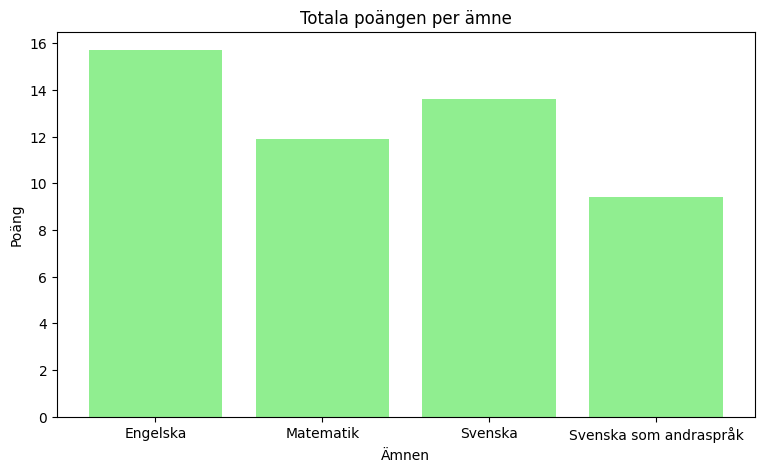

In [122]:
import matplotlib.pyplot as plt

subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
points = [15.7, 11.9, 13.6, 9.4]  

plt.figure(figsize=(9, 5))
plt.bar(subjects, points, color="Lightgreen")
plt.title('Totala poängen per ämne')
plt.xlabel('Ämnen')
plt.ylabel('Poäng')
plt.show()

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.


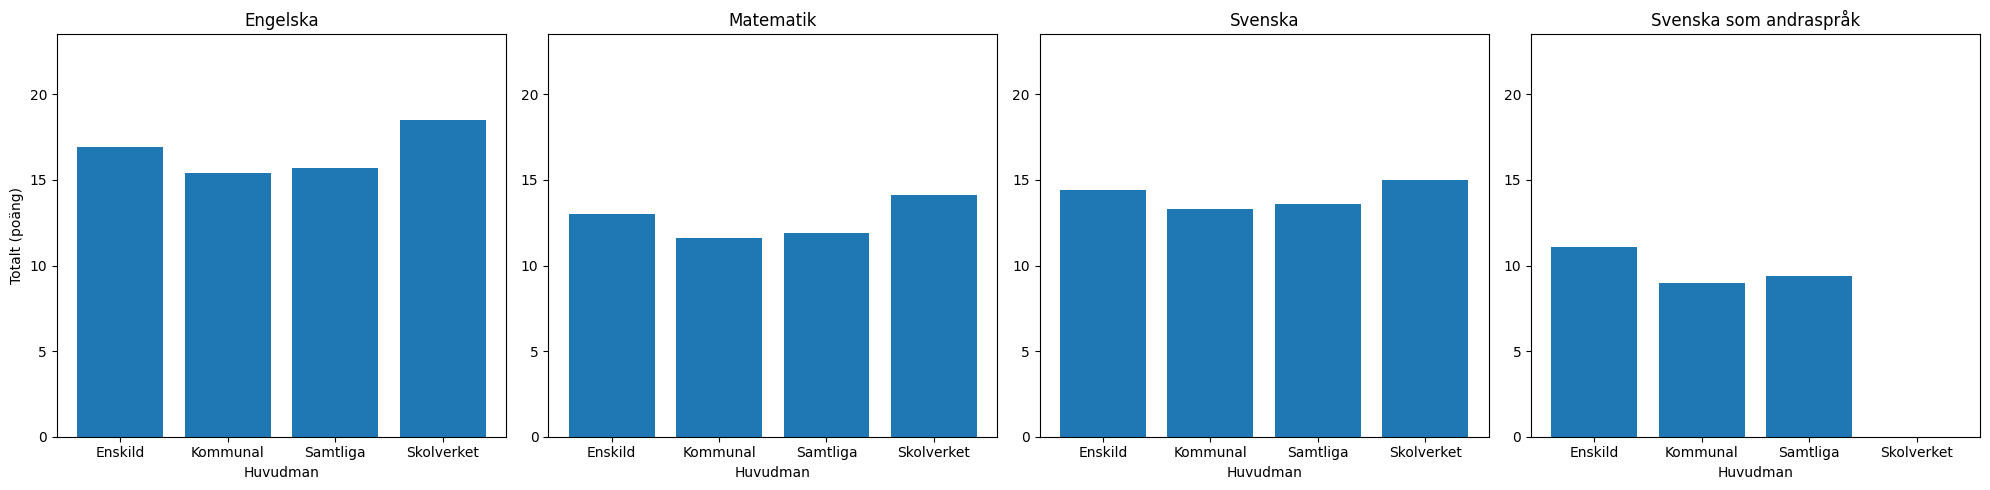

In [123]:
# Konvertera 'Totalt (poäng)' till flyttal för varje DataFrame
for df in dataframes.values():
    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors='coerce')

# Skapar en figur och subplots för varje ämne
fig, axs = plt.subplots(1, len(subjects), figsize=(20, 5))

# Hittar det högsta värdet bland alla staplar i alla DataFrames
max_y_value = max(df['Totalt (poäng)'].max() for df in dataframes.values()) + 5  # Lägger till 5 enheter


# Itererar över varje ämne och skapar ett stapeldiagram i varje subplot
for i, subject in enumerate(subjects):
    df_subject = dataframes[subject]
    # Vi grupperar data efter 'Huvudman' och beräknar summan av 'Totalt (poäng)'
    df_grouped = df_subject.groupby("Huvudman")["Totalt (poäng)"].sum().reset_index()
    # Skapar stapeldiagrammet
    axs[i].bar(df_grouped["Huvudman"], df_grouped["Totalt (poäng)"])
    axs[i].set_title(subject)
    axs[i].set_xlabel("Huvudman")
    axs[i].set_ylim(0, max_y_value)  # Justerar y-axeln enligt det beräknade maxvärdet
    if i == 0:  # Sätter y-axelns etikett endast för första subploten
        axs[i].set_ylabel("Totalt (poäng)")

plt.tight_layout()
plt.show()



## Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.


a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

In [124]:
import plotly.express as px

# Läs in din data
df = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", skiprows=9)

# Uppdatera kolumnnamnen
df.columns = [
    "Läsår", 
    "Totalt antal elever", 
    "Flickor", 
    "Pojkar", 
    "Totalt antal elever med slutbetyg", 
    "Flickor med slutbetyg", 
    "Pojkar med slutbetyg", 
    "Totalt antal elever med godkända slutbetyg", 
    "Flickor med godkända slutbetyg", 
    "Pojkar med godkända slutbetyg"
]
# Filtrera bort rader som inte matchar det förväntade läsårsformatet som t.ex. 2019/20
df = df[df['Läsår'].str.contains('^\d{4}/\d{2}$', na=False)]

# Extraherar startåret och lägger till 1 för att få slutåret
df['Läsår'] = df['Läsår'].str.slice(0, 4).astype(int)


# Beräkna andelen elever utan godkända betyg
df["Andel ej godkända Totalt"] = (1 - df["Totalt antal elever med godkända slutbetyg"] / df["Totalt antal elever"]) * 100
df["Andel ej godkända Flickor"] = (1 - df["Flickor med godkända slutbetyg"] / df["Flickor"]) * 100
df["Andel ej godkända Pojkar"] = (1 - df["Pojkar med godkända slutbetyg"] / df["Pojkar"]) * 100

# Skapar linjediagrammet
fig = px.line(df, x="Läsår", y=["Andel ej godkända Totalt", "Andel ej godkända Flickor", "Andel ej godkända Pojkar"],
              labels={"value": "Andel ej godkända (%)", "variable": "Kategori"},
              title="Andel elever utan godkända betyg")

# Tar bort onödigt mellanrum mellan heltalsåren och utökar x-axelns intervall
fig.update_xaxes(dtick=1,range=[2018,2023])

fig.show()


b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

In [125]:
df = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", usecols="A:D")

df.columns = [
    "Läsår", 
    "Totalt meritvärde 16 ämnen", 
    "Flickor meritvärde 16 ämnen", 
    "Pojkar meritvärde 16 ämnen"
]

# Filtrera bort rader som inte matchar det förväntade läsårsformatet som t.ex. 2019/20
df = df[df['Läsår'].str.contains('^\d{4}/\d{2}$', na=False)]

# Extraherar startåret och lägger till 1 för att få slutåret
df['Läsår'] = df['Läsår'].str.slice(0, 4).astype(int)

# Skapar linjediagrammet
fig = px.line(df, x="Läsår", y=["Totalt meritvärde 16 ämnen", "Flickor meritvärde 16 ämnen", "Pojkar meritvärde 16 ämnen"],
              labels={"value": "Meritvärde", "variable": "Kategori"},
              title="Genomsnittligt meritvärde för 16 ämnen")

# Sätter axelns intervall från 2018 till 2023 för att inkludera hela dataserien
fig.update_xaxes(dtick=1, range=[2018,2023])

fig.show()

c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.


In [128]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Skapa en figur för meritvärde
fig_merit = make_subplots(rows=1, cols=3, subplot_titles=('Förgymnasial utbildning', 'Gymnasial utbildning', 'Eftergymnasial utbildning'))

# Lägger till stapeldiagram för meritvärde för varje utbildningsnivå
# Förgymnasial utbildning
fig_merit.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[163.8, 172.2, 155.8], name='Förgymnasial'), row=1, col=1)
# Gymnasial utbildning
fig_merit.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[197.4, 207.2, 188.2], name='Gymnasial'), row=1, col=2)
# Eftergymnasial utbildning
fig_merit.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[239.1, 247.9, 230.7], name='Eftergymnasial'), row=1, col=3)

# Uppdatera layout för meritvärdediagrammet
fig_merit.update_yaxes(title_text='Meritvärde', range=[0, 300], row=1, col=1)
fig_merit.update_yaxes(range=[0, 300], row=1, col=2)
fig_merit.update_yaxes(range=[0, 300], row=1, col=3)
fig.show()







In [127]:
# Skapa en figur för andelen saknat betyg
fig_saknat_betyg = make_subplots(rows=1, cols=3, subplot_titles=('Förgymnasial utbildning', 'Gymnasial utbildning', 'Eftergymnasial utbildning'))

# Lägg till stapeldiagram för andelen saknat betyg för varje utbildningsnivå
# Förgymnasial utbildning
fig_saknat_betyg.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[63.5, 61.5, 65.3], name='Förgymnasial'), row=1, col=1)
# Gymnasial utbildning
fig_saknat_betyg.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[37.4, 35.2, 39.5], name='Gymnasial'), row=1, col=2)
# Eftergymnasial utbildning
fig_saknat_betyg.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[16.8, 16.1, 17.5], name='Eftergymnasial'), row=1, col=3)

# Uppdatera layout för diagrammet med andelen saknat betyg
fig_saknat_betyg.update_yaxes(title_text='Andel saknat betyg (%)', range=[0, 100], row=1, col=1)
fig_saknat_betyg.update_yaxes(range=[0, 100], row=1, col=2)
fig_saknat_betyg.update_yaxes(range=[0, 100], row=1, col=3)
fig_saknat_betyg.show()



## Uppgift 2 - KPIer & EDA
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.